In [1]:
from Learn_faces import *
import matplotlib.pyplot as plt
plt.style.use('ggplot')


Using cuDNN version 5105 on context None
Mapped name None to device cuda1: GeForce GTX 960 (0000:03:00.0)


In [2]:
def loadImages(ImagesList):
    ImagesList = ["/home/falmasri/Desktop/Datasets/Mixed2/" + s for s in ImagesList]
    Imgs = []
    for idx in range(len(ImagesList)):
        jpgfile = np.array(Image.open(ImagesList[idx]))
        Imgs.append(jpgfile)
    return np.array(Imgs)

In [3]:
DS_selection = 1
if DS_selection == 1:
    dataset_path = 'Datasets/MixedFacesDataset.pkl'
    Train, Valid, Test = load_dataset(dataset_path)
    train_x, train_y = Train
elif DS_selection == 2:
    dataset_path = 'Datasets/1028621-Mixed2.pkl'
    Train, Valid, Test = load_dataset(dataset_path)
    train_x, train_y = Train
    train_x = loadImages(train_x[0:50])

jpgfile = train_x[50:100]
labels = train_y[0:50]
DS = jpgfile, labels
print 'Dataset Loaded'

Loading dataset...
Dataset Loaded


... building the model
Parameters loaded
(50, 100, 100, 3)
average is: 0.482740; max is: 0.716504


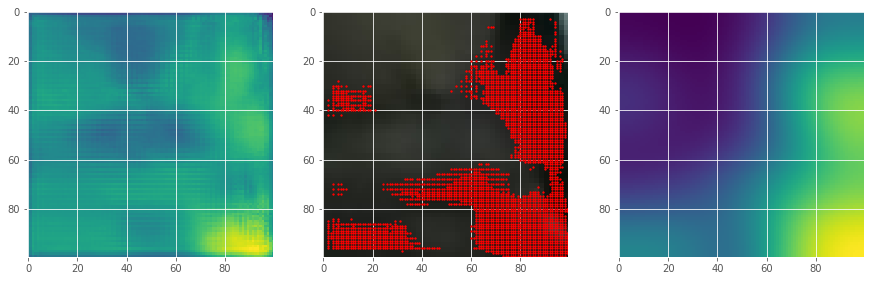

average is: 0.756575; max is: 1.024601


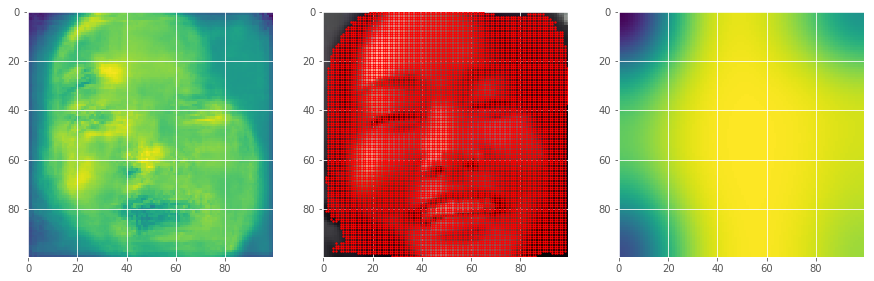

average is: 0.132027; max is: 0.475226


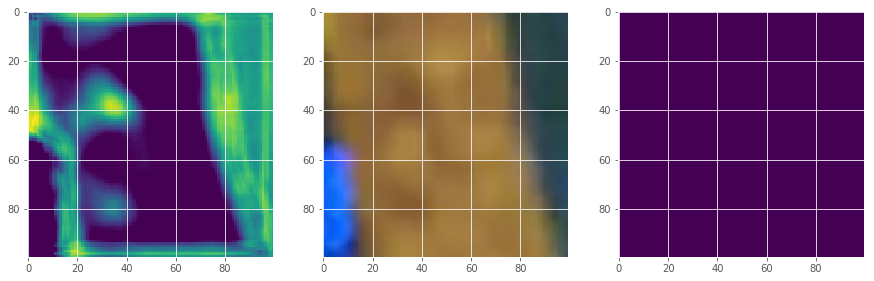

average is: 0.609072; max is: 0.855777


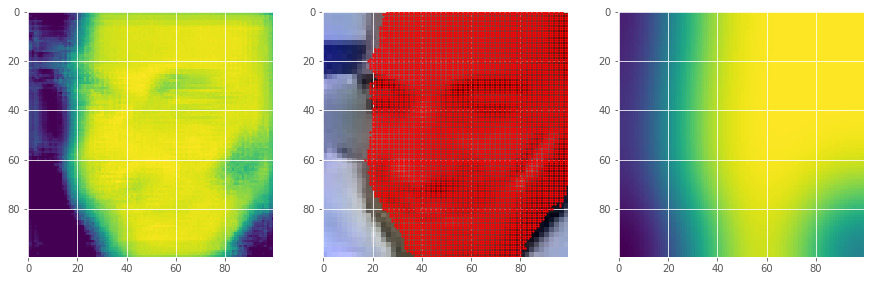

average is: 0.827014; max is: 1.048636


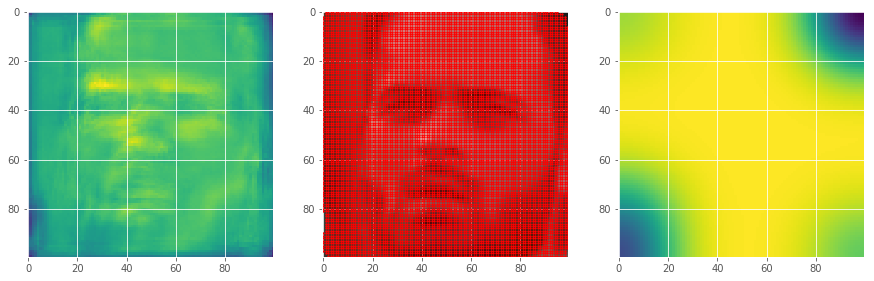

average is: 0.008882; max is: 0.198014


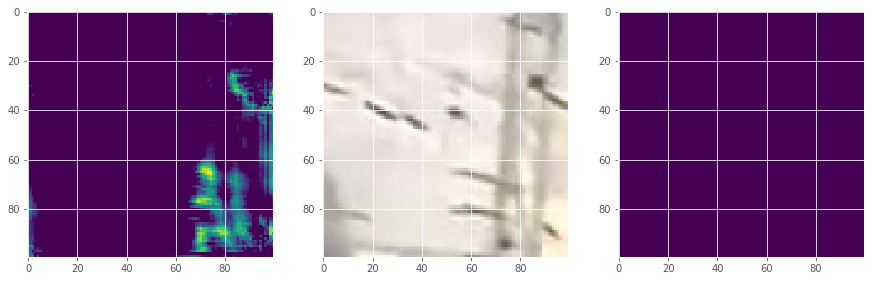

average is: 0.603457; max is: 1.048941


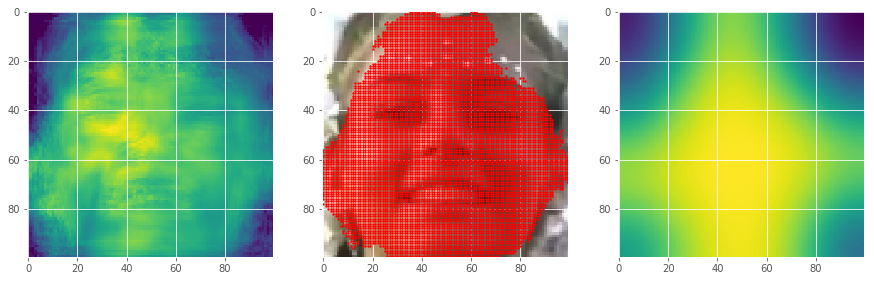

average is: 0.779780; max is: 1.037547


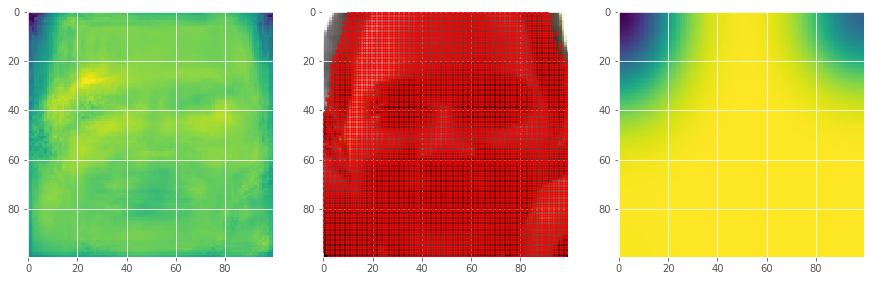

average is: 0.572612; max is: 0.886246


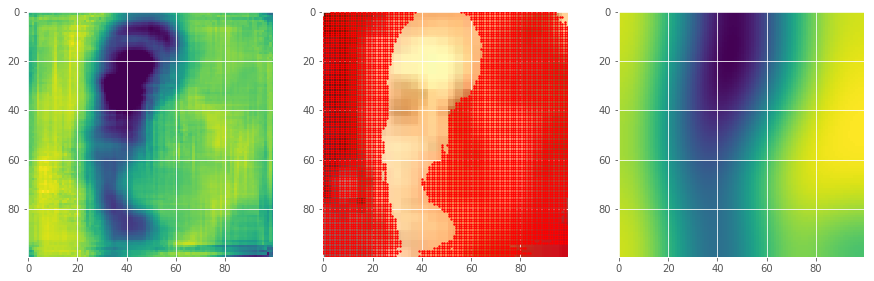

average is: 0.796232; max is: 1.148761


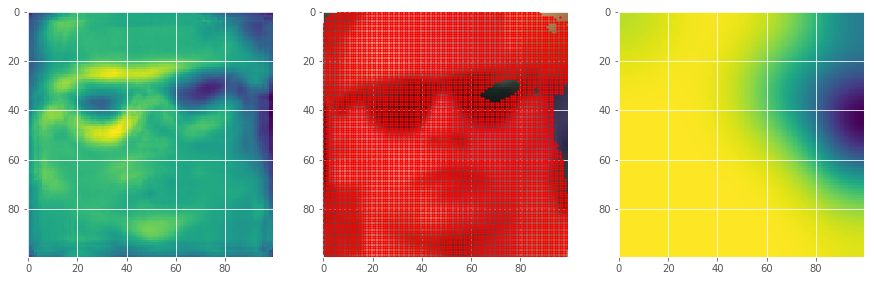

average is: 0.613929; max is: 0.919444


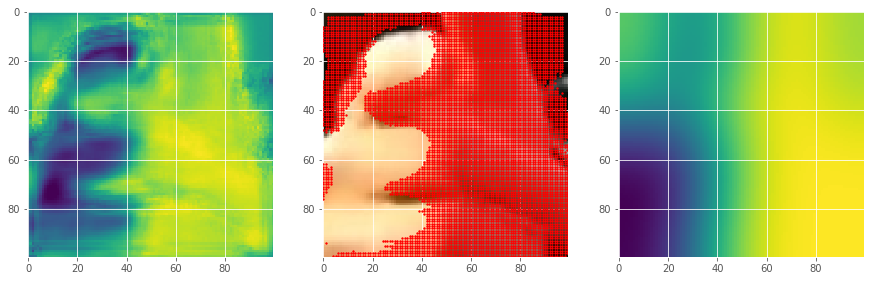

average is: 0.619022; max is: 1.122738


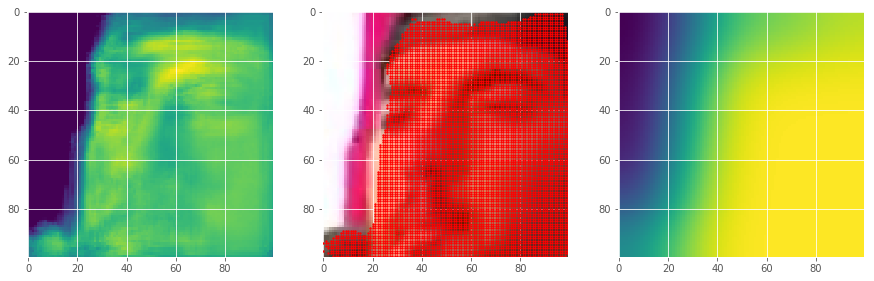

average is: 0.788314; max is: 0.996514


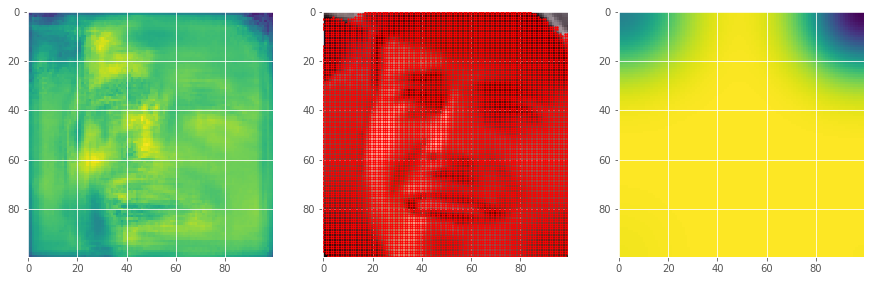

average is: 0.603441; max is: 0.919322


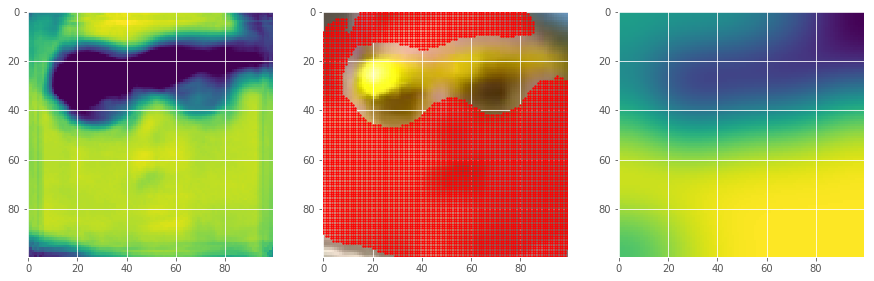

average is: 0.782583; max is: 0.924109


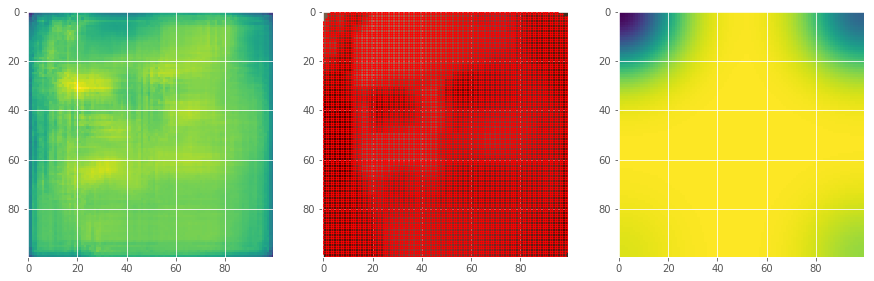

average is: 0.000168; max is: 0.073057


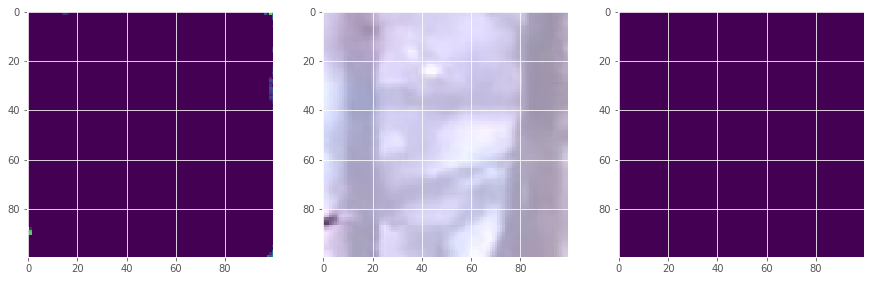

average is: 0.760998; max is: 1.004611


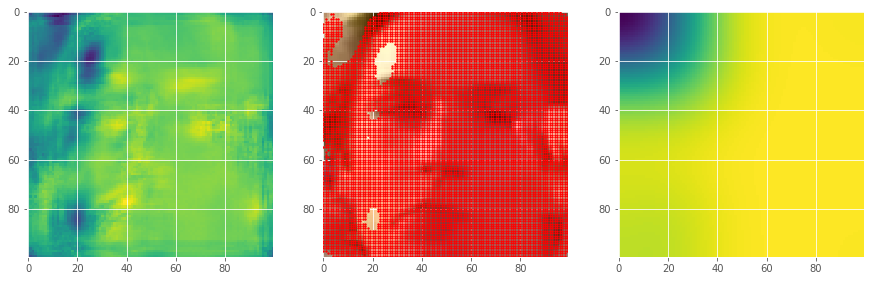

average is: 0.696874; max is: 0.835573


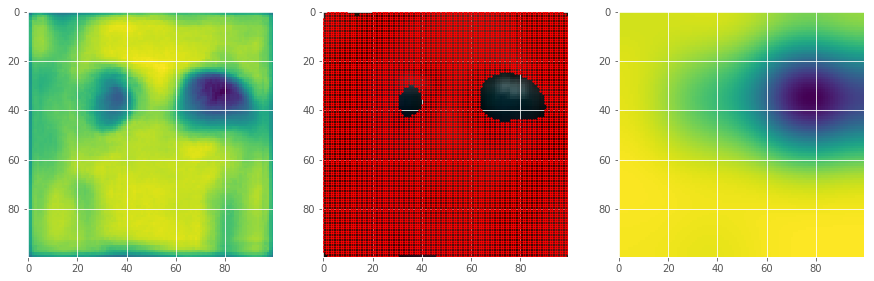

average is: 0.456202; max is: 0.839549


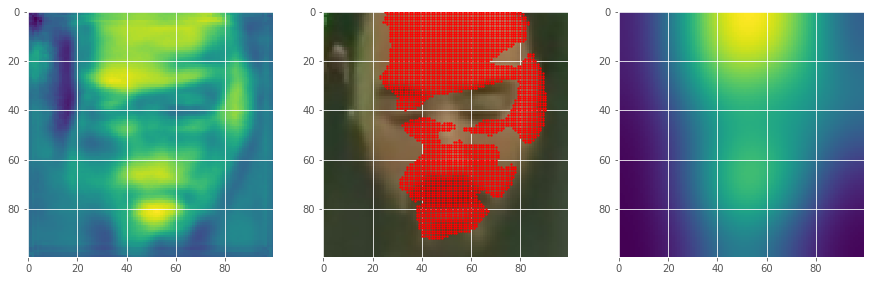

average is: 0.390834; max is: 0.537363


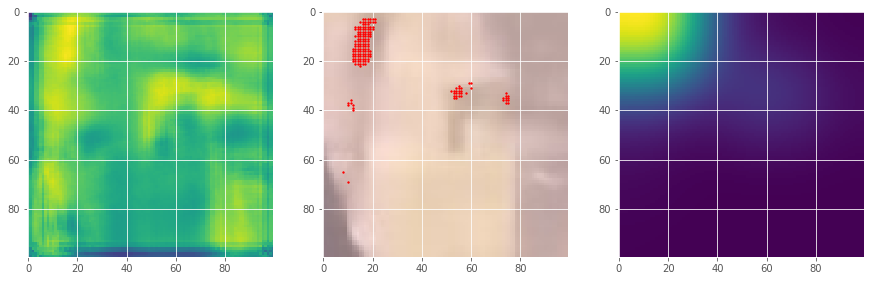

average is: 0.809855; max is: 0.944031


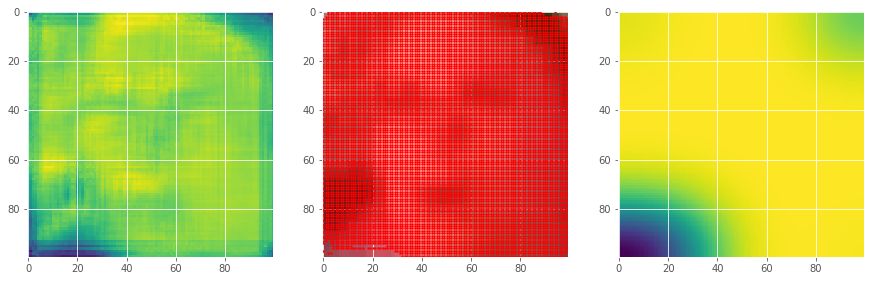

average is: 0.456668; max is: 0.996851


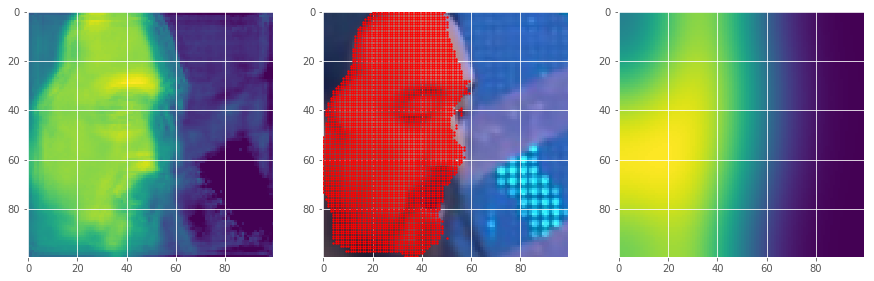

average is: 0.449586; max is: 0.967605


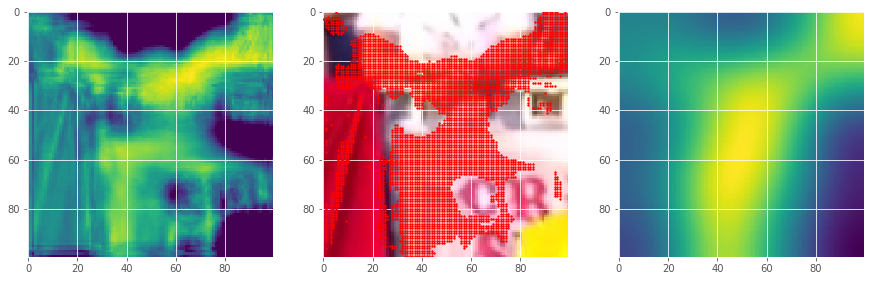

average is: 0.107507; max is: 0.500314


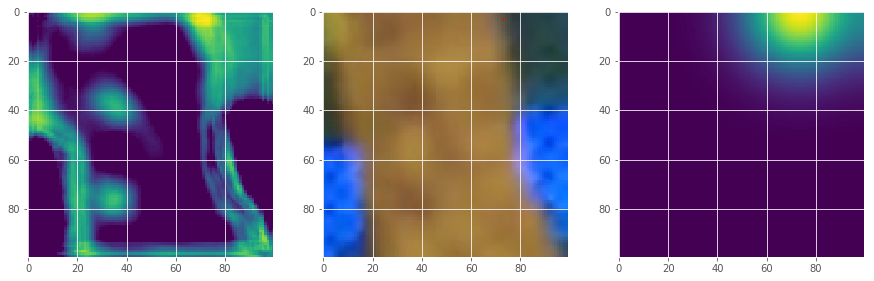

average is: 0.773862; max is: 0.849710


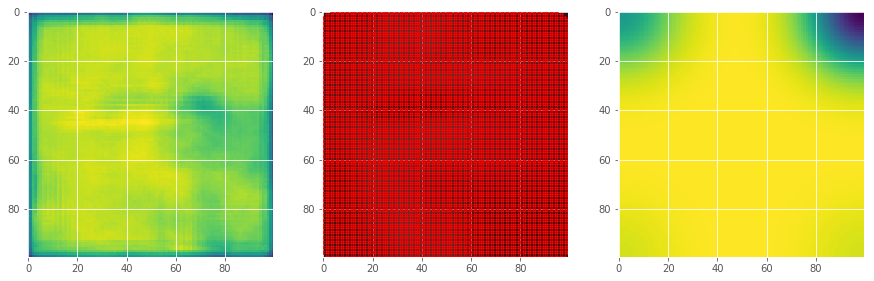

average is: 0.474680; max is: 0.914871


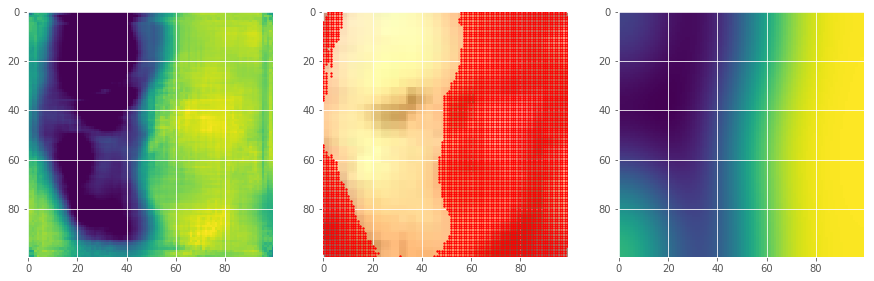

average is: 0.747699; max is: 0.917707


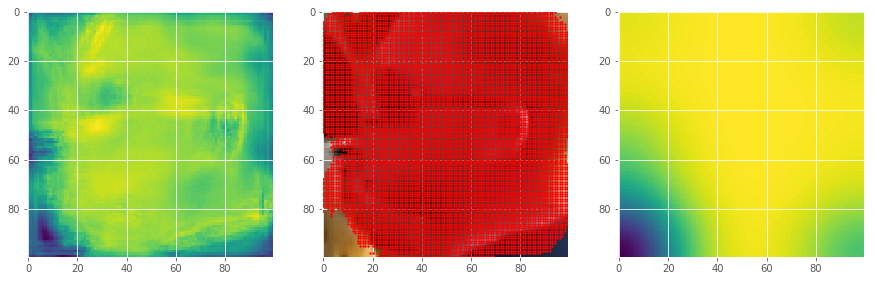

average is: 0.682014; max is: 1.014130


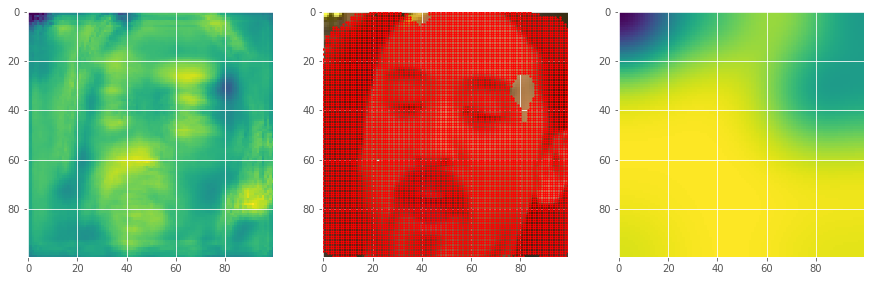

average is: 0.091452; max is: 0.676348


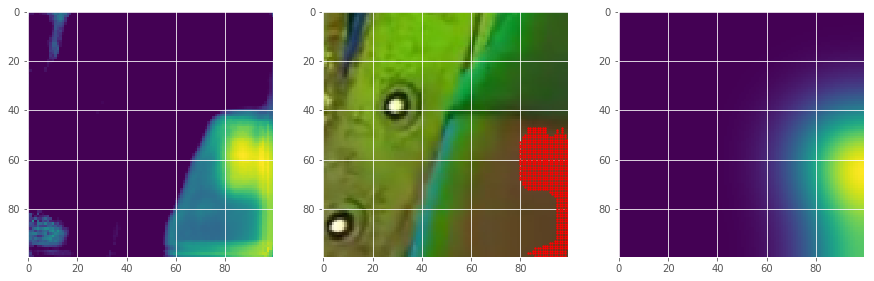

average is: 0.596697; max is: 0.962096


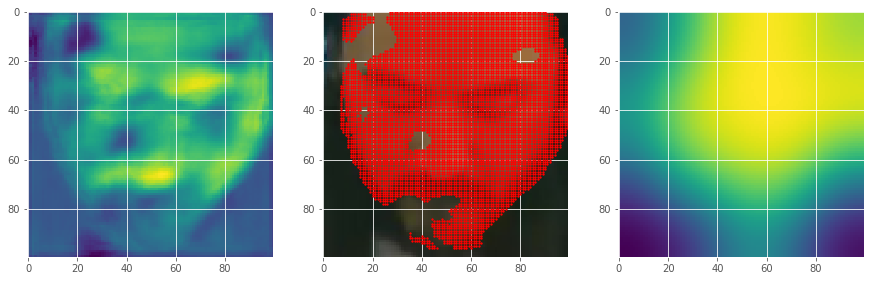

average is: 0.764324; max is: 1.143453


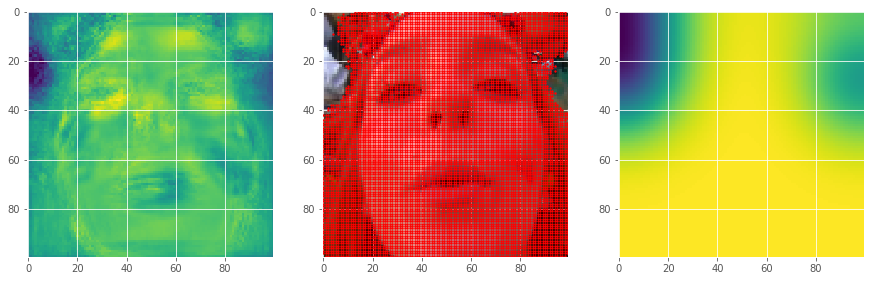

average is: 0.511202; max is: 1.014237


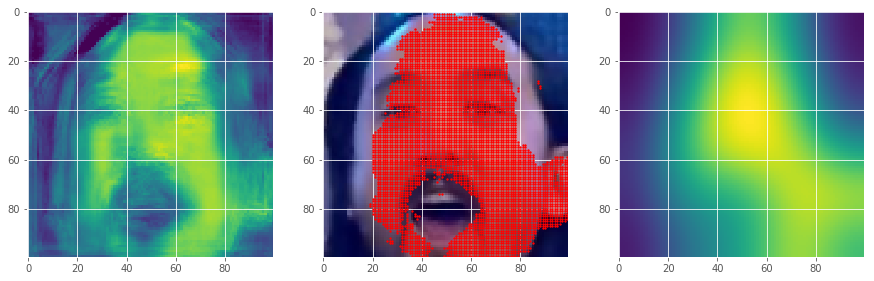

average is: 0.712352; max is: 0.952408


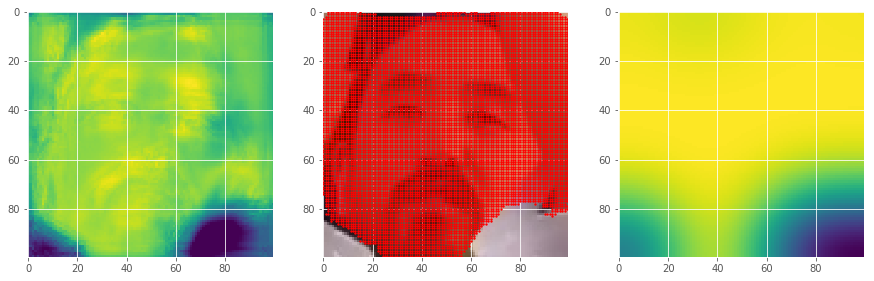

average is: 0.491381; max is: 0.827517


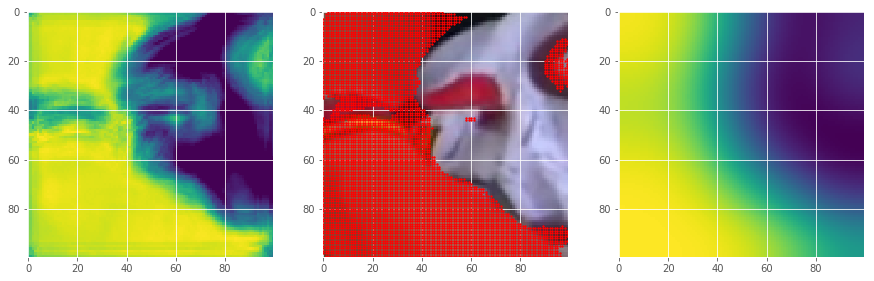

average is: 0.147596; max is: 0.701331


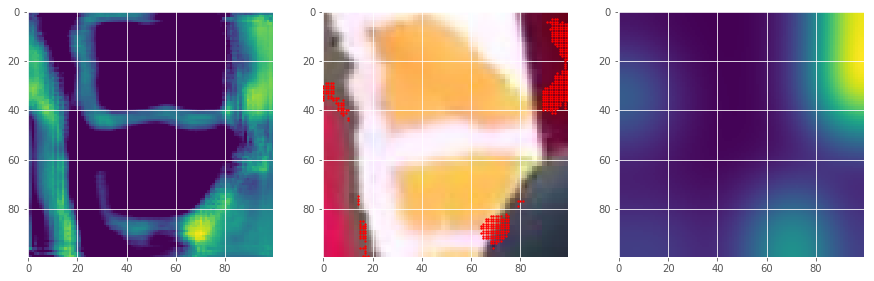

average is: 0.223884; max is: 0.637844


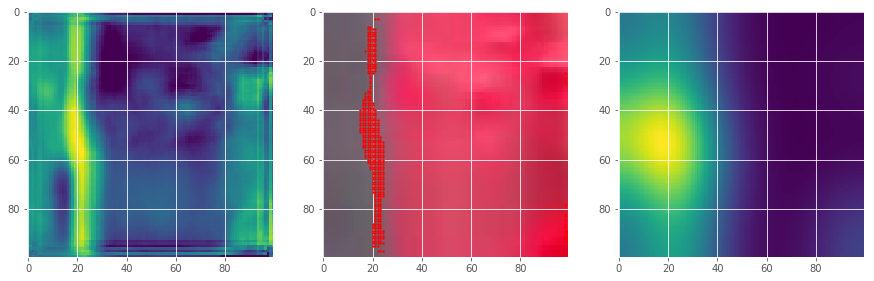

average is: 0.691611; max is: 0.912154


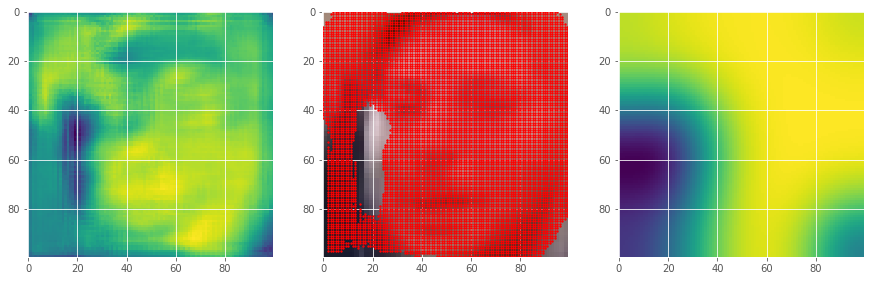

average is: 0.767559; max is: 1.030406


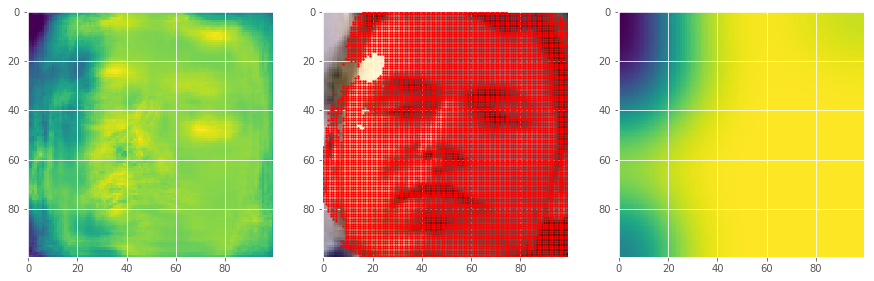

average is: 0.592088; max is: 0.921056


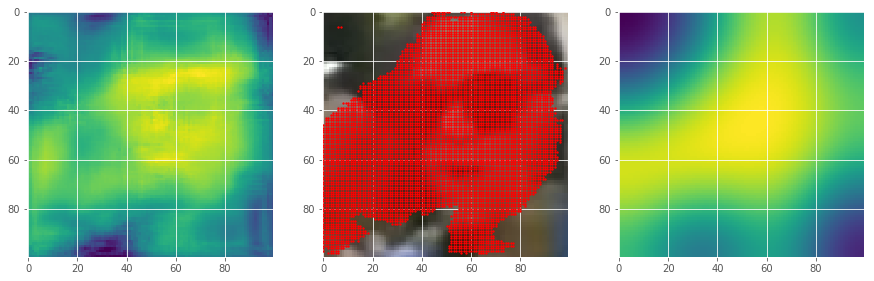

average is: 0.626415; max is: 0.894940


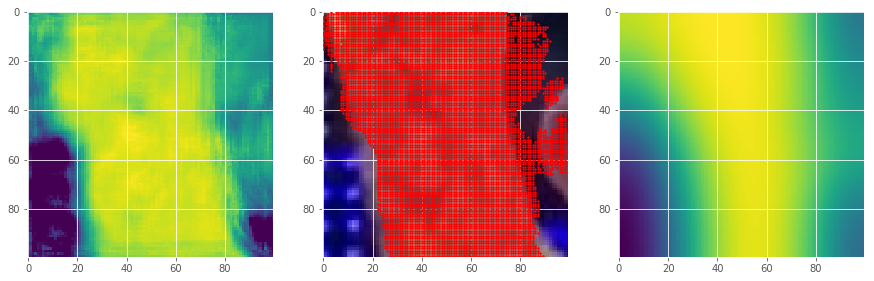

average is: 0.034458; max is: 0.187236


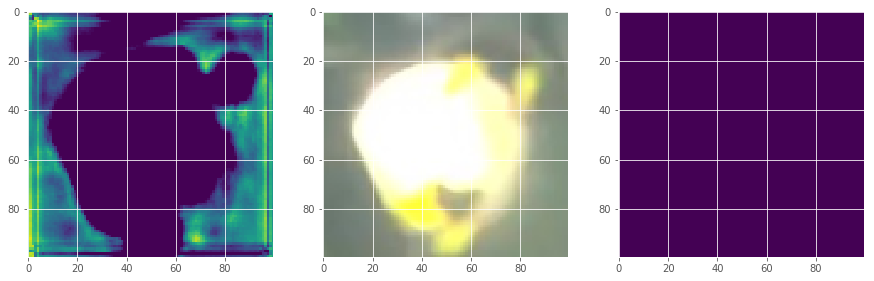

average is: 0.719224; max is: 0.935989


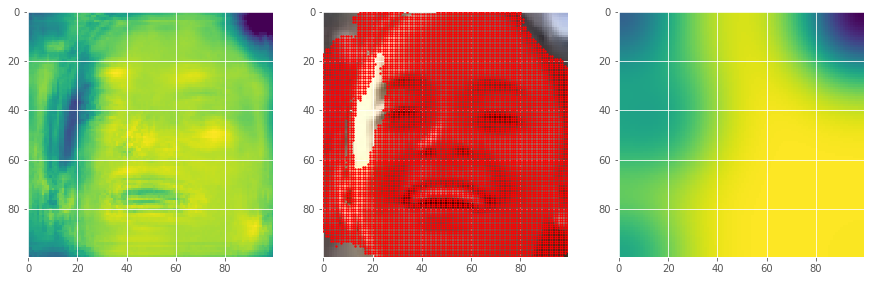

average is: 0.786788; max is: 0.949135


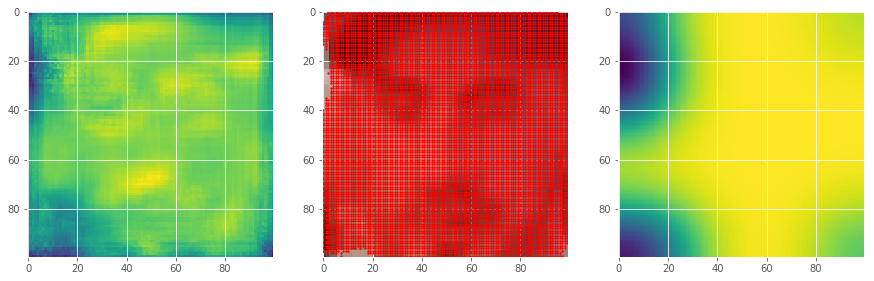

average is: 0.736097; max is: 1.029608


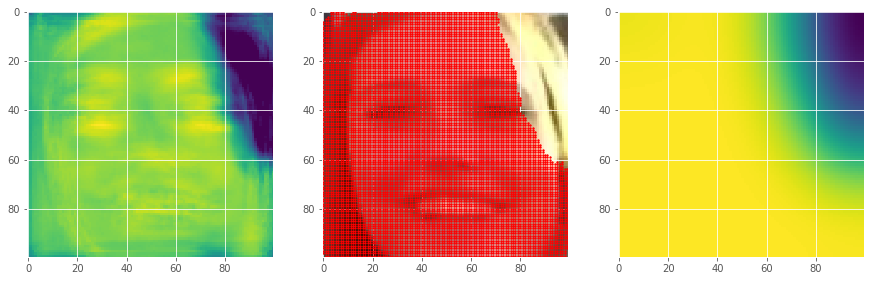

average is: 0.674936; max is: 1.054254


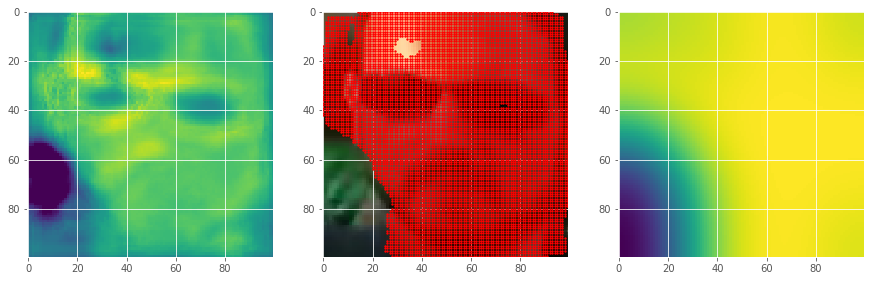

average is: 0.263606; max is: 0.762100


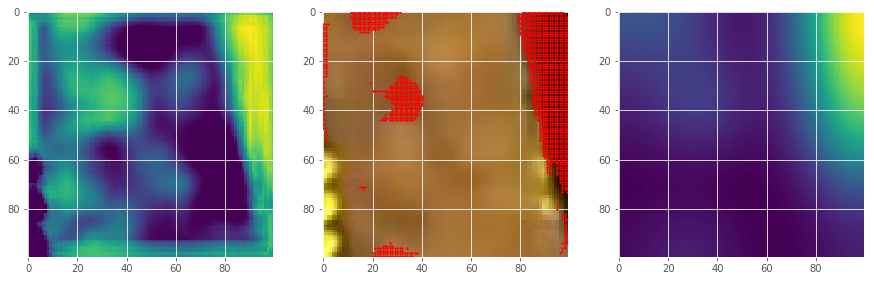

average is: 0.569435; max is: 1.159603


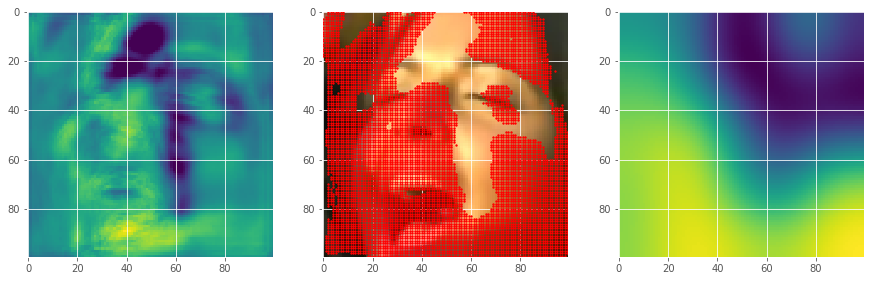

average is: 0.244493; max is: 0.689250


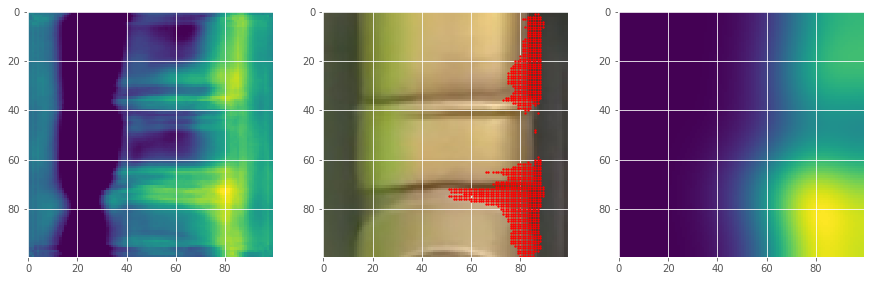

average is: 0.718892; max is: 1.042639


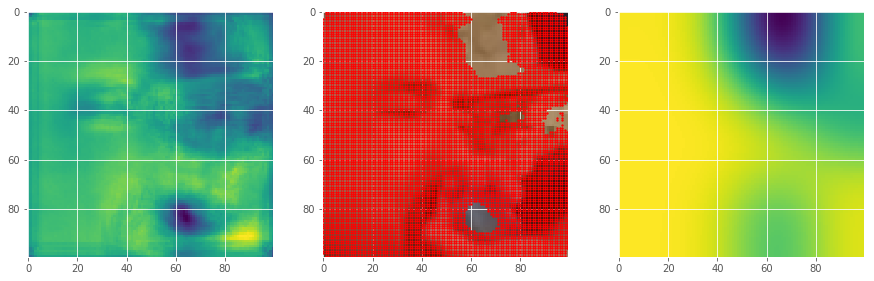

average is: 0.710290; max is: 0.999432


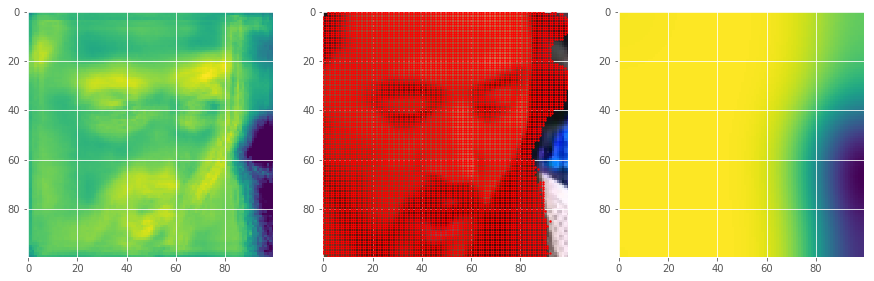

In [20]:
maps, avg, max, jpgfile = visualizer('weights/FCNN-comp1',[50,3], DS)

width = 15
height = 15
for i in range(maps.shape[0]):
    print "average is: %f; max is: %f" %(avg[i],max[i])
#     print  maps[i][maps[i] > 0]
    plt.figure(figsize=(width, height))
    plt.subplot(131)
    plt.imshow(maps[i, 0])
    plt.subplot(132)
    plt.imshow(jpgfile[i])
    bin_map = maps[i, 0]
    bin_map[bin_map > 0.5] = 1
    bin_map[bin_map <= 0.5] = 0
    x, y = np.argwhere(bin_map == 1).T
    plt.scatter(y, x,s= 3, color='r') 
    plt.subplot(133)
    blur = cv2.GaussianBlur(maps[i,0], (101, 101), 0)
    plt.imshow(blur) #, cmap='inferno'
#     plt.colorbar()
    plt.show()
    